# ---------------------------------
# 1. Import Libraries
# ---------------------------------

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


pd.set_option('display.max_columns',None)
sns.set_theme(context='paper',style='darkgrid')

warnings.filterwarnings('ignore')

# ---------------------------------
# 2. Load Data
# ---------------------------------

In [77]:
df = pd.read_excel('premiums.xlsx')
print(df.shape)
df.head()

(50000, 13)


,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


# ---------------------------------
# 3. Data Overview
# ---------------------------------

In [78]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    50000 non-null  int64 
 1   Gender                 50000 non-null  object
 2   Region                 50000 non-null  object
 3   Marital_status         50000 non-null  object
 4   Number Of Dependants   50000 non-null  int64 
 5   BMI_Category           50000 non-null  object
 6   Smoking_Status         49989 non-null  object
 7   Employment_Status      49998 non-null  object
 8   Income_Level           49987 non-null  object
 9   Income_Lakhs           50000 non-null  int64 
 10  Medical History        50000 non-null  object
 11  Insurance_Plan         50000 non-null  object
 12  Annual_Premium_Amount  50000 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.0+ MB


,Age,Number Of Dependants,Income_Lakhs,Annual_Premium_Amount
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,34.593480,1.712080,23.018200,15768.116320
std,15.000437,1.498248,24.219197,8419.839675
min,18.000000,-3.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13929.000000
75%,45.000000,3.000000,31.000000,22275.250000
max,356.000000,5.000000,930.000000,43471.000000


In [79]:
# unique values in category column
cat_cols = [col for col in df.select_dtypes(include='object').columns]
for col in cat_cols:
    print(f"{col:<20}:{df[col].unique()}")


Gender              :['Male' 'Female']
Region              :['Northwest' 'Southeast' 'Northeast' 'Southwest']
Marital_status      :['Unmarried' 'Married']
BMI_Category        :['Normal' 'Obesity' 'Overweight' 'Underweight']
Smoking_Status      :['No Smoking' 'Regular' 'Occasional' nan 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
Employment_Status   :['Salaried' 'Self-Employed' 'Freelancer' nan]
Income_Level        :['<10L' '10L - 25L' '> 40L' '25L - 40L' nan]
Medical History     :['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
Insurance_Plan      :['Bronze' 'Silver' 'Gold']


# ---------------------------------
# 4. Data Cleaning
# ---------------------------------

In [80]:
# Missing values
df.isna().sum()
df2 = df.fillna('Unknown')


In [81]:
df2.isna().sum()

Age                      0
Gender                   0
Region                   0
Marital_status           0
Number Of Dependants     0
BMI_Category             0
Smoking_Status           0
Employment_Status        0
Income_Level             0
Income_Lakhs             0
Medical History          0
Insurance_Plan           0
Annual_Premium_Amount    0
dtype: int64

In [82]:
# caping age to 80 years
df2=df2[df2['Age']<=80]

# duplication check
df2.duplicated().sum()

0

In [83]:
# absolute values fo number of dependants
df2['Number Of Dependants'] = df2['Number Of Dependants'].apply(lambda row: abs(row) if row<0 else row) 
# updating the Income lakhs
df2['Income_Lakhs']=df2['Income_Lakhs'].apply(lambda row: int((row/100)*10) if row>=100 else row)
# changing the smoking status
df2['Smoking_Status']=df2['Smoking_Status'].apply(lambda row: 'No Smoking' if row not in ['Regular', 'Occasional'] else row )

In [84]:
df2.describe()

,Age,Number Of Dependants,Income_Lakhs,Annual_Premium_Amount
count,49942.000000,49942.000000,49942.000000,49942.000000
mean,34.403648,1.717853,22.716191,15767.897041
std,13.682354,1.492130,21.914384,8418.981981
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,16.000000,13929.000000
75%,45.000000,3.000000,31.000000,22275.000000
max,72.000000,5.000000,99.000000,43471.000000


Phase 4 – Exploratory Data Analysis (EDA)



Insights Gathering:

How premium varies with age, BMI, smoking, income, etc.

Which medical conditions contribute most.

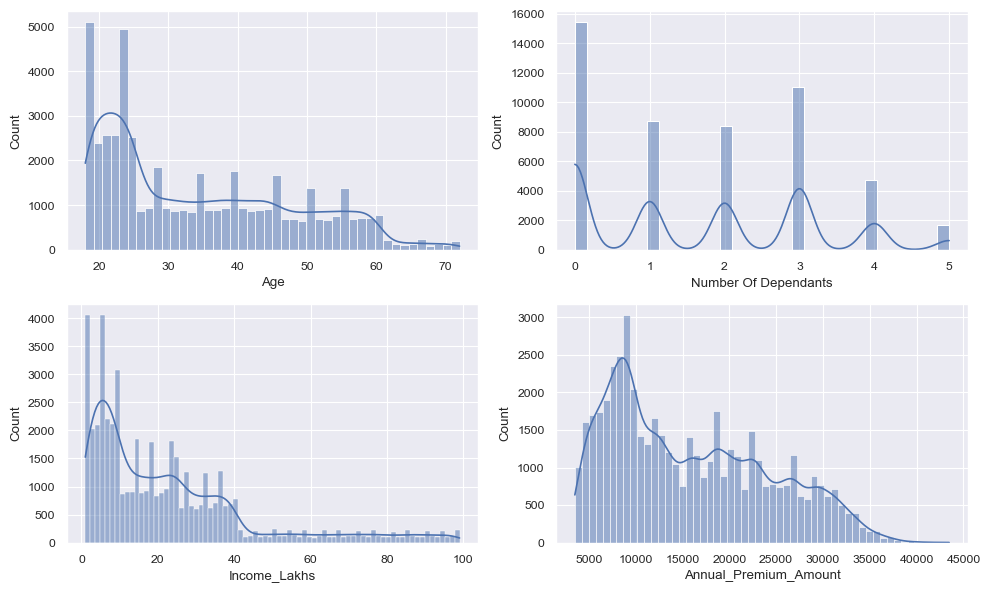

In [85]:
df3 = df2.copy()
num_cols = df3.select_dtypes(exclude='object').columns.tolist()
# univariate Analysis numerical

fig, axes = plt.subplots(2,2,figsize=(10,6))
axes = axes.flatten()

for index, col in enumerate(num_cols):
    sns.histplot(df3[col],kde=True,ax=axes[index])

plt.tight_layout()
plt.show()



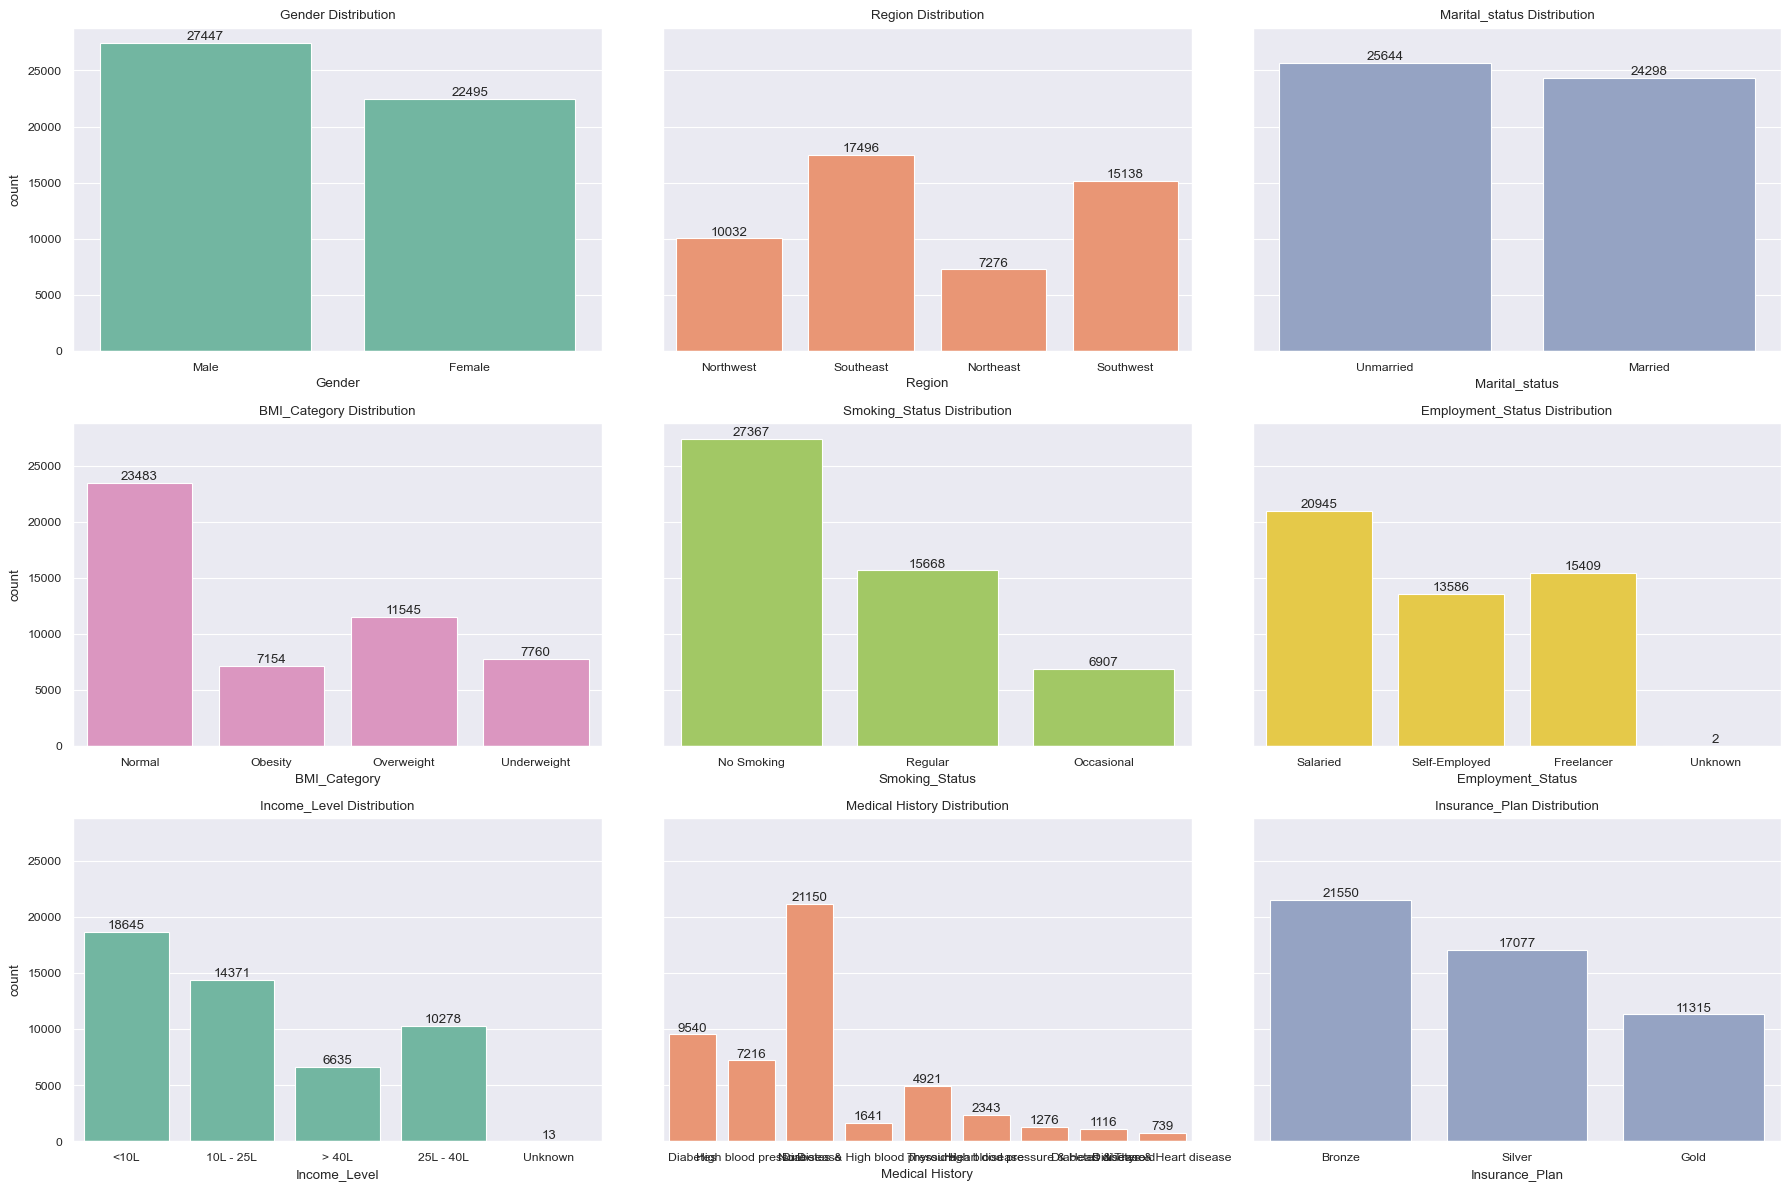

Gender
Male      0.549578
Female    0.450422
Name: proportion, dtype: float64 

Region
Southeast    0.350326
Southwest    0.303112
Northwest    0.200873
Northeast    0.145689
Name: proportion, dtype: float64 

Marital_status
Unmarried    0.513476
Married      0.486524
Name: proportion, dtype: float64 

BMI_Category
Normal         0.470205
Overweight     0.231168
Underweight    0.155380
Obesity        0.143246
Name: proportion, dtype: float64 

Smoking_Status
No Smoking    0.547976
Regular       0.313724
Occasional    0.138300
Name: proportion, dtype: float64 

Employment_Status
Salaried         0.419386
Freelancer       0.308538
Self-Employed    0.272036
Unknown          0.000040
Name: proportion, dtype: float64 

Income_Level
<10L         0.373333
10L - 25L    0.287754
25L - 40L    0.205799
> 40L        0.132854
Unknown      0.000260
Name: proportion, dtype: float64 

Medical History
No Disease                             0.423491
Diabetes                               0.191022
High b

In [86]:
# univariate Analysis categorical
n_col = 3
n_row = len(cat_cols)//n_col
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f']
fig, axes = plt.subplots(nrows=n_row, ncols=n_col, figsize=(6*n_col, 4*n_row),sharey=True)
axes = axes.flatten()

for index, col in enumerate(cat_cols):
    plot = sns.countplot(x =df3[col],ax=axes[index],color =colors[index % len(colors)])
    axes[index].set_title(f"{col} Distribution")

    for container in plot.containers:
        plot.bar_label(container,fmt='%d', label_type='edge')

plt.tight_layout()
plt.show()

for col in cat_cols:
    print(df3[col].value_counts(normalize=True),'\n')

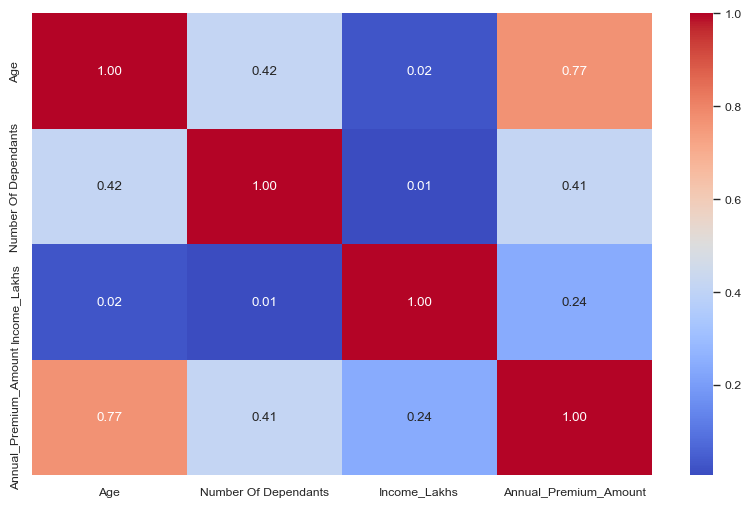

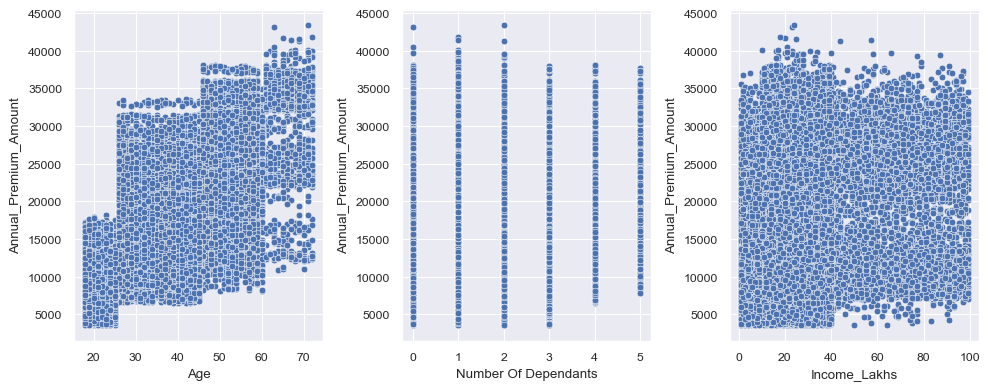

In [87]:
# Bivariate Analysis:

# Numeric vs Target 
corr_mat = df3.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr_mat,annot=True,fmt=".2f",cmap='coolwarm',cbar=True)
plt.show()

fig, axes = plt.subplots(1,3,figsize=(10,4))
axes = axes.flatten()


for index, col in enumerate(['Age', 'Number Of Dependants', 'Income_Lakhs']):
    sns.scatterplot(x=df3[col],y=df3['Annual_Premium_Amount'],ax=axes[index])

plt.tight_layout()
plt.show()



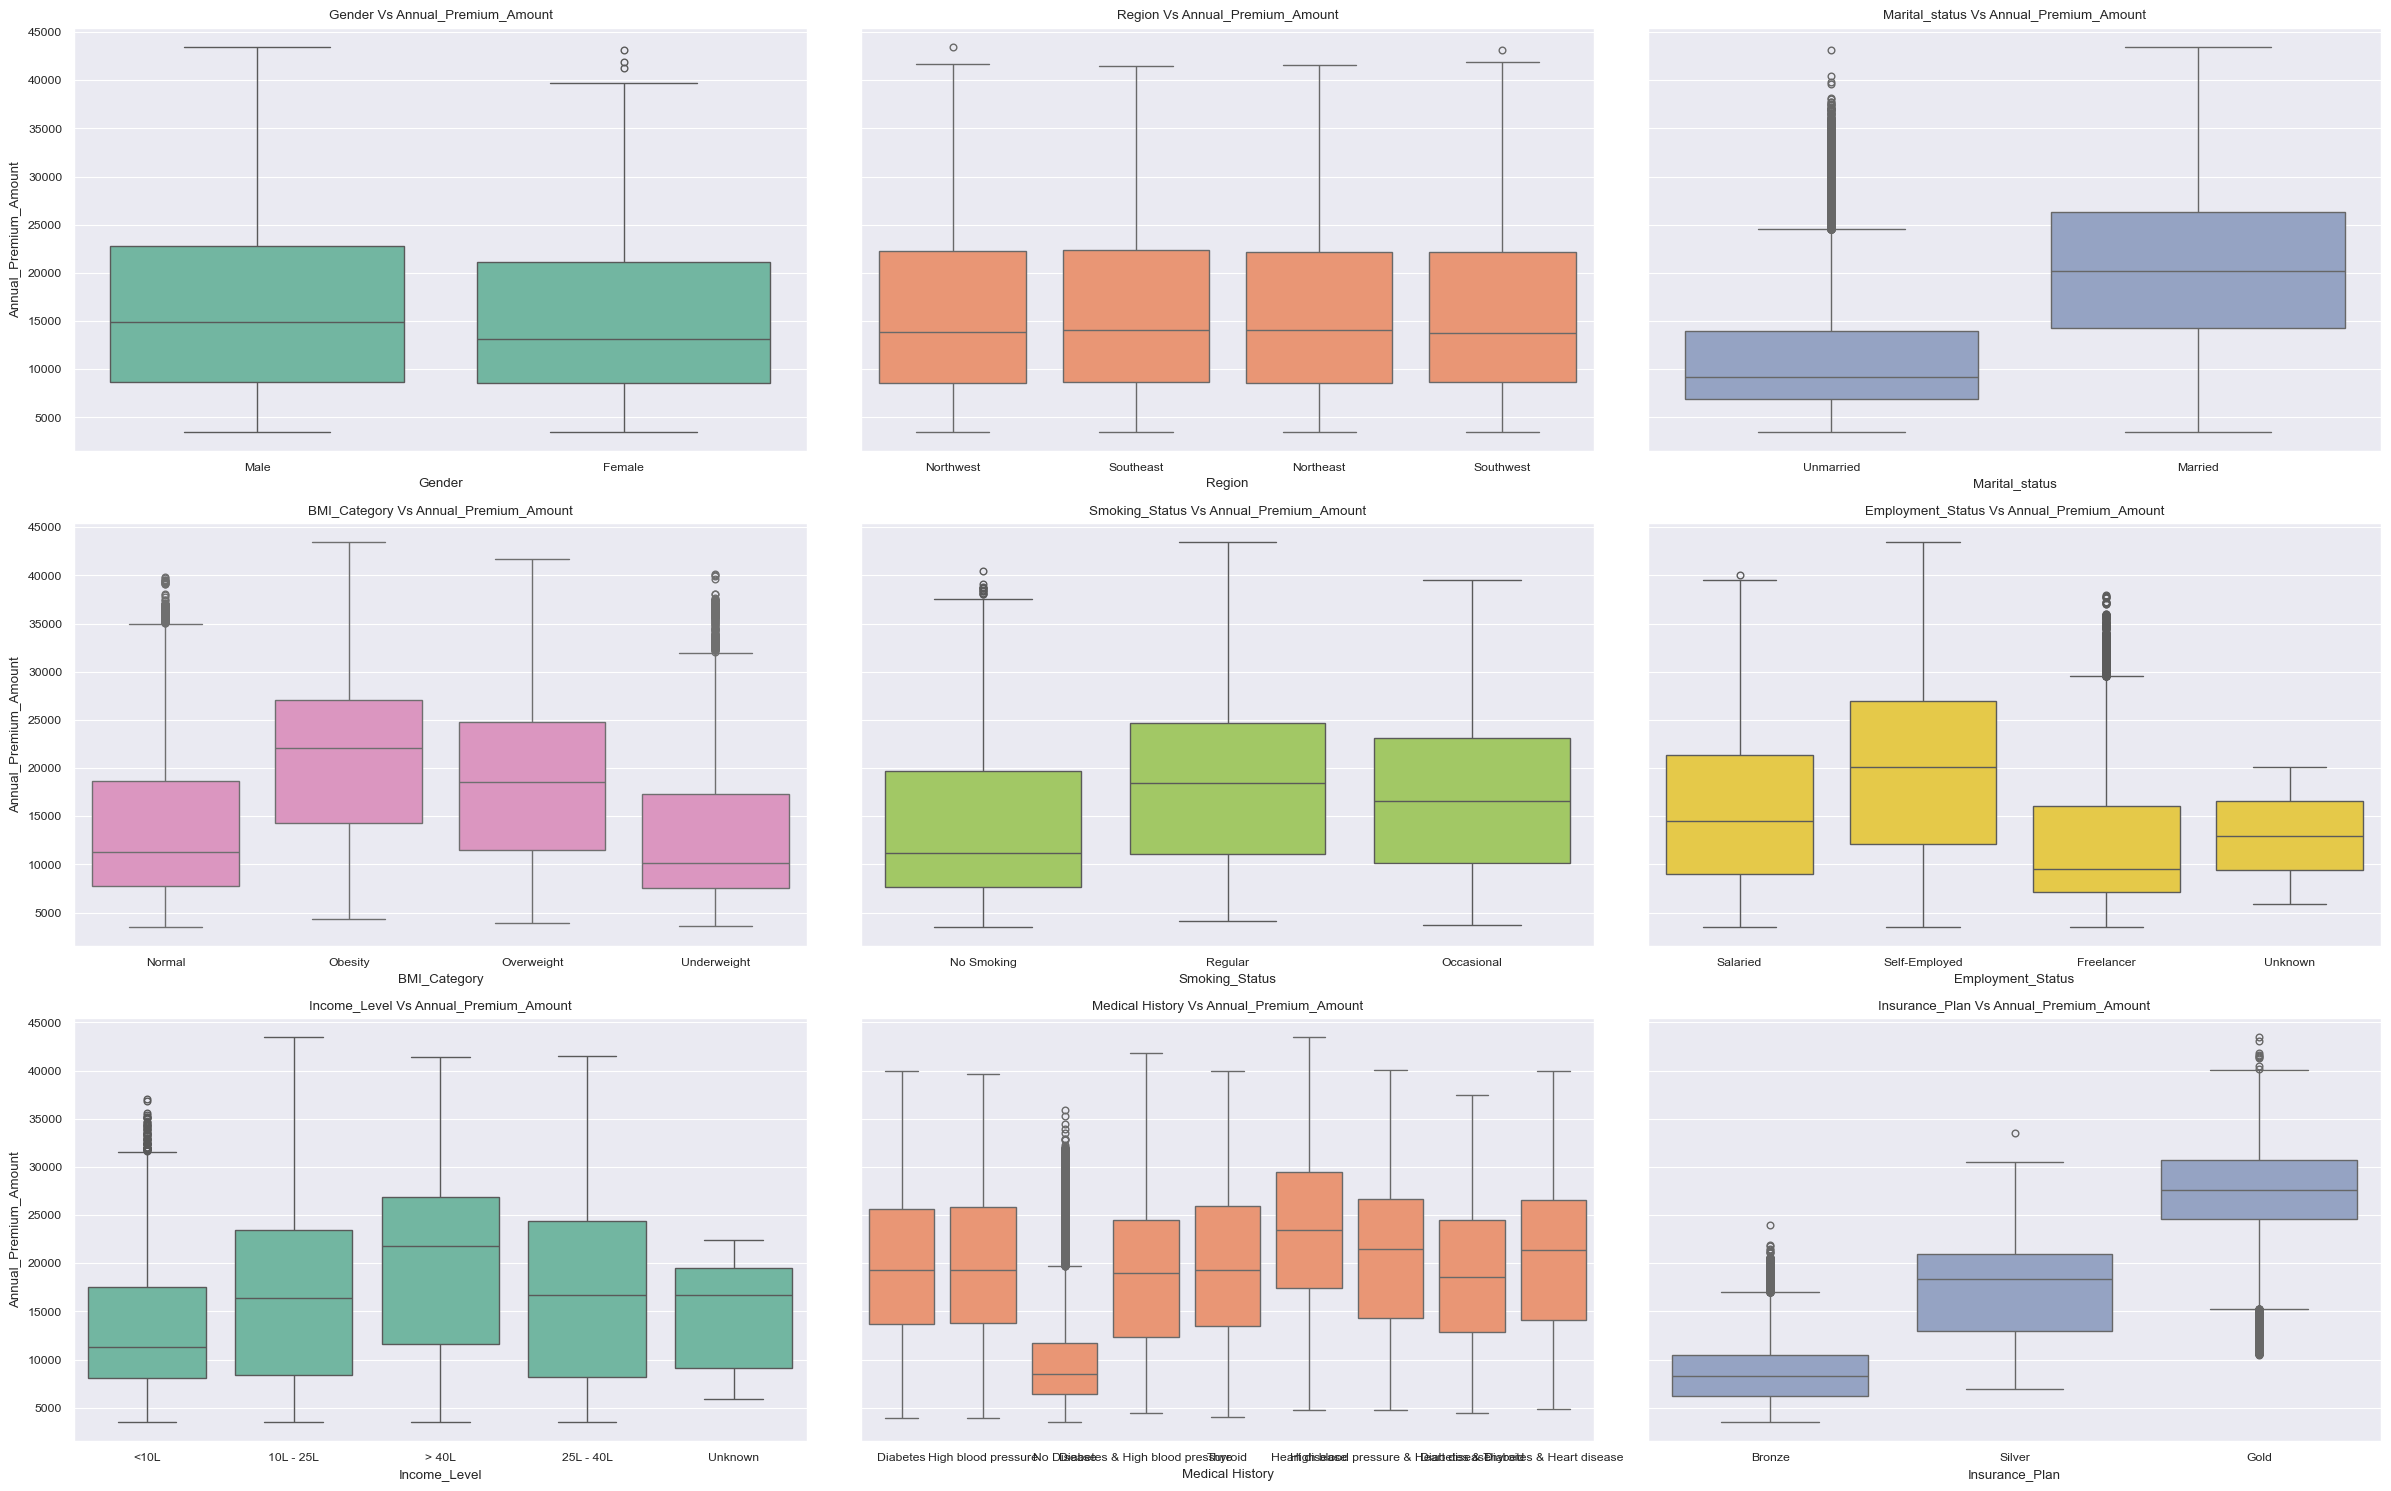

In [88]:
# Categorical vs Target → boxplots, group means.
fig, axes = plt.subplots(nrows=n_row, ncols=n_col, figsize=(8*n_col, 5*n_row),sharey=True)
axes = axes.flatten()

for index, col in enumerate(cat_cols):
    plot = sns.boxplot(x =df3[col],y = df3['Annual_Premium_Amount'],ax=axes[index],color =colors[index % len(colors)])
    axes[index].set_title(f"{col} Vs Annual_Premium_Amount")

    # for container in plot.containers:
    #     plot.bar_label(container,fmt='%d', label_type='edge')

plt.tight_layout()
plt.show()


Phase 5 – Feature Engineering



In [89]:
#Categorical Encoding:

# Ordinal (Income_Level, BMI_Category).
df3['Gender'] = df3['Gender'].map({'Male':1, 'Female':0})
df3['Marital_status'] = df3['Marital_status'].map({'Unmarried':0, 'Married':1})
df3['BMI_Category'] = df3['BMI_Category'].map({'Normal':1, 'Obesity':3, 'Overweight':2, 'Underweight':0})
df3['Insurance_Plan'] =df3['Insurance_Plan'].map({'Bronze':0, 'Silver':1, 'Gold':2})
# One-hot (Region, Employment_Status, Insurance_Plan).
df4 = pd.get_dummies(df3,columns=['Region','Smoking_Status','Employment_Status','Income_Level','Medical History'],drop_first=True)




In [90]:
df4.head()

,Age,Gender,Marital_status,Number Of Dependants,BMI_Category,Income_Lakhs,Insurance_Plan,Annual_Premium_Amount,Region_Northwest,Region_Southeast,Region_Southwest,Smoking_Status_Occasional,Smoking_Status_Regular,Employment_Status_Salaried,Employment_Status_Self-Employed,Employment_Status_Unknown,Income_Level_25L - 40L,Income_Level_<10L,Income_Level_> 40L,Income_Level_Unknown,Medical History_Diabetes & Heart disease,Medical History_Diabetes & High blood pressure,Medical History_Diabetes & Thyroid,Medical History_Heart disease,Medical History_High blood pressure,Medical History_High blood pressure & Heart disease,Medical History_No Disease,Medical History_Thyroid
0,26,1,0,0,1,6,0,9053,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,29,0,1,2,3,6,0,16339,False,True,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,49,0,1,2,1,20,1,18164,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False
3,30,0,1,3,1,77,2,20303,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False
4,18,1,0,0,2,99,1,13365,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False


In [94]:
# Scaling:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()



df4[['Age','Income_Lakhs','Annual_Premium_Amount']] = scalar.fit_transform(df4[['Age','Income_Lakhs','Annual_Premium_Amount']])


In [97]:
from sklearn.model_selection import train_test_split

X = df4.drop('Annual_Premium_Amount',axis=1)
y = df4['Annual_Premium_Amount']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=42)


In [98]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train,y_train)

y_pred = lr_model.predict(X_test)

In [99]:
from sklearn.metrics import r2_score, mean_squared_error

print(r2_score(y_test,y_pred))

0.9290896044072523


In [100]:
mean_squared_error(y_test,y_pred)

0.07086678628801607